# Wing Fan

## Research question/interests

From this Airbnb listing dataset.**I want to discover the correlation among the time duration of the guests' stay, amenities provided in each suite, and how pricing different for each listing.**
We can learn the demand for the length of stay and price differ for each listing in HongKong, therefore, potential landlords who wish to invest in HongKong renting could fulfill the demands of the renters and maximize the renting occupancy.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [104]:
sns.set_theme(style="ticks",
              font_scale=1.3,)

import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

In [105]:
df=pd.read_csv('../data/raw/listings.csv')

In [106]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,https://www.airbnb.com/rooms/17891,20221223064914,2022-12-23,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.47
1,72571,https://www.airbnb.com/rooms/72571,20221223064914,2022-12-23,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2849554/d2262...,304876,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.05
2,923017,https://www.airbnb.com/rooms/923017,20221223064914,2022-12-23,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,https://a0.muscache.com/pictures/f3913158-fa84...,4971086,...,4.85,4.86,4.75,NaN,t,2,2,0,0,3.03
3,944283,https://www.airbnb.com/rooms/944283,20221223064914,2022-12-23,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,https://a0.muscache.com/pictures/9ade4292-c83a...,5100812,...,4.72,4.85,4.57,NaN,f,2,1,1,0,0.61
4,956857,https://www.airbnb.com/rooms/956857,20221223064914,2022-12-23,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,https://a0.muscache.com/pictures/3ab4ff36-81de...,5100812,...,5.00,5.00,5.00,NaN,f,2,1,1,0,0.04


In [107]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [108]:
df.nunique(axis=0)

id                                              5194
listing_url                                     5194
scrape_id                                          1
last_scraped                                       1
source                                             2
                                                ... 
calculated_host_listings_count                    43
calculated_host_listings_count_entire_homes       26
calculated_host_listings_count_private_rooms      33
calculated_host_listings_count_shared_rooms       14
reviews_per_month                                338
Length: 75, dtype: int64

In [109]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,0.000000,5194.000000,5194.000000,5194.000000,0.000000,...,2511.000000,2510.000000,2511.000000,2511.000000,0.000000,5194.000000,5194.000000,5194.000000,5194.000000,2543.000000
mean,104180044199799264.000000,20221223064914.000000,99527082.774548,121.021756,148.982095,nan,22.296253,114.161216,2.602233,nan,...,4.692732,4.695351,4.741641,4.479837,nan,105.182133,14.515787,82.769157,7.595302,0.722375
std,248610801834706112.000000,0.000000,115094918.852142,161.198674,200.223614,nan,0.034002,0.049359,2.159186,nan,...,0.561899,0.559082,0.451648,0.639978,nan,144.708172,27.182154,130.464544,16.352671,1.030108
min,17891.000000,20221223064914.000000,63038.000000,1.000000,1.000000,nan,22.191250,113.856340,0.000000,nan,...,0.000000,1.000000,1.000000,1.000000,nan,1.000000,0.000000,0.000000,0.000000,0.010000
25%,21106946.750000,20221223064914.000000,12922210.750000,3.000000,5.000000,nan,22.280300,114.153690,1.250000,nan,...,4.660000,4.650000,4.670000,4.340000,nan,3.000000,1.000000,0.000000,0.000000,0.100000
50%,34290062.000000,20221223064914.000000,58862332.000000,21.000000,29.000000,nan,22.291910,114.171260,2.000000,nan,...,4.870000,4.880000,4.880000,4.640000,nan,18.000000,3.000000,5.000000,0.000000,0.340000
75%,45789470.000000,20221223064914.000000,138649185.000000,293.000000,384.000000,nan,22.310880,114.180460,3.000000,nan,...,5.000000,5.000000,5.000000,4.870000,nan,255.000000,15.000000,230.000000,8.000000,0.960000
max,787199569053724672.000000,20221223064914.000000,491510217.000000,449.000000,737.000000,nan,22.528410,114.362470,16.000000,nan,...,5.000000,5.000000,5.000000,5.000000,nan,383.000000,118.000000,363.000000,62.000000,11.440000


In [110]:
df.price.unique()

array(['$1,400.00', '$577.00', '$1,036.00', ..., '$1,024.00', '$1,169.00',
       '$487.00'], dtype=object)

In [111]:
df.amenities.unique()

array(['["Pets allowed", "Fire pit", "Refrigerator", "Outdoor furniture", "Long term stays allowed", "AC - split type ductless system", "Coffee maker", "Washer", "TV", "Elevator", "Kitchen", "Dedicated workspace", "Wifi"]',
       '["Kitchen", "Long term stays allowed", "Washer", "Fire extinguisher", "Air conditioning", "Dedicated workspace", "Wifi", "TV with standard cable", "Heating"]',
       '["Children\\u2019s books and toys", "Self check-in", "Carbon monoxide alarm", "Long term stays allowed", "Elevator", "Shampoo", "Hair dryer", "Bed linens", "Free street parking", "Refrigerator", "Baby bath", "Dishes and silverware", "Dryer", "Kitchen", "Smart lock", "Microwave", "Window guards", "Iron", "Crib", "Heating", "Cooking basics", "EV charger", "Hot water", "Single level home", "Security cameras on property", "Essentials", "Washer", "Air conditioning", "Wifi", "TV with standard cable", "Hangers", "Smoke alarm", "Fire extinguisher", "Stove"]',
       ...,
       '["Pets allowed", "Kitc

In [112]:
count_series = df['amenities'].value_counts()
print(count_series)

["Long term stays allowed", "Kitchen", "Air conditioning", "Iron", "Wifi"]                                                                                                                                                                                                                                                                                                                                                             387
["Hangers", "Long term stays allowed", "Washer", "Kitchen", "Air conditioning", "Iron", "Wifi"]                                                                                                                                                                                                                                                                                                                                         41
["Hangers", "Long term stays allowed", "Elevator", "Washer", "Kitchen", "Air conditioning", "Wifi"]                                               

In [113]:
df['amenities'] = df['amenities'].str.lower()
df['variables'] = df['amenities'].str.split(',')
count_list = {}
for index, row in df.iterrows():
    for variable in row['variables']:
        variable = variable.strip()
        if variable in count_list:
            count_list[variable] += 1
        else:
            count_list[variable] =1

In [114]:
sorted_count_list = sorted(count_list.items(), key=lambda x:x[1], reverse = True)

In [115]:
print(df.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
variables                                        object
Length: 76, dtype: object


In [116]:
df1 = pd.DataFrame(sorted_count_list, columns=['amenities', 'quantity'])

df1.to_csv("../data/raw/listing_Wing_processed2.csv", index=None)
df1

,amenities,quantity
0,"""air conditioning""",4414
1,"""long term stays allowed""",4042
2,"""essentials""",3113
3,"""hangers""",2939
4,"""kitchen""",2863
...,...,...
955,"""40\"" hdtv with standard cable""",1
956,"""50\"" hdtv with dvd player""",1
957,"""mannings body soap""",1
958,"""mannings conditioner""",1


In [117]:
df1['quantity'] = pd.to_numeric(df1['quantity'])

In [118]:
print(df1.dtypes)

amenities    object
quantity      int64
dtype: object


In [119]:

df2 = df1.nlargest(20, ['quantity'])
df2

,amenities,quantity
0,"""air conditioning""",4414
1,"""long term stays allowed""",4042
2,"""essentials""",3113
3,"""hangers""",2939
4,"""kitchen""",2863
5,"""hair dryer""",2822
6,"""elevator""",2604
7,"""tv""",2598
8,"""shampoo""",2570
9,"""iron""",2546


In [120]:
df3 = df1.nsmallest(20, ['quantity'])
df3

,amenities,quantity
497,"""fast wifi \u2013 79 mbps""",1
498,"""fast wifi \u2013 76 mbps""",1
499,"""65\"" hdtv with hbo max",1
500,hulu,1
501,"""hdtv with apple tv",1
502,"""fast wifi \u2013 413 mbps""",1
503,"""rejoice shampoo""",1
504,"""bbq grill: charcoal",1
505,"gas""",1
506,"[""hdtv with premium cable""",1


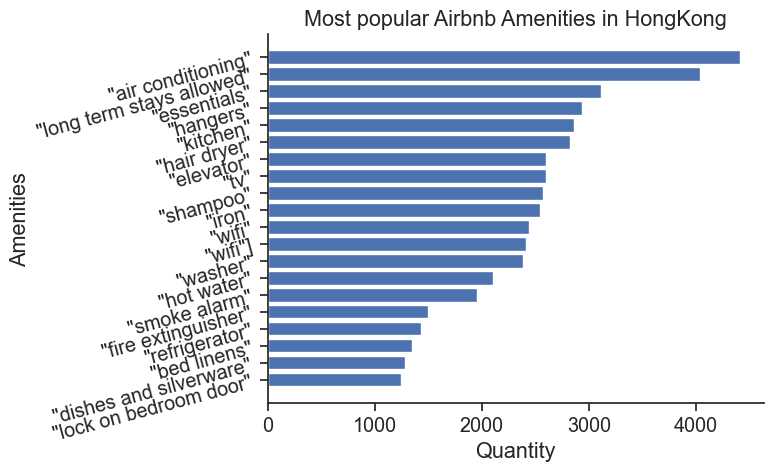

<Figure size 20000x10000 with 0 Axes>

In [121]:
df2 = df2.sort_values('quantity', ascending=True)

plt.barh(df2['amenities'], df2['quantity'])
plt.xlabel('Quantity')
plt.ylabel('Amenities')
plt.title('Most popular Airbnb Amenities in HongKong')
plt.yticks(rotation=15)
plt.figure(figsize=(200,100))

plt.show()

In [122]:
plt.savefig('../images/most_popular_amenities.png')

<Figure size 640x480 with 0 Axes>

### Insight of this graph above:
#### From this graph, we can see that 'air conditioning' is one of the most demanding amenities in HongKong Airbnb listings, 'long term stays allowed' is at the second place. However, we can refer to the earlier 5194 listings in HongKong airbnb, only around 4414 of the HongKong airbnb listings have AC. Some other interesting discovery is that amenities such as 'lock on bedroom door' is also in the top 20 amenities essential for the Hong Kong Airbnb customers. 

In [123]:
df.minimum_nights.unique()

array([  60,    2,    1,    4,   13,    6,   30,   31,   29,    3,    7,
          5,   20,   28,   90,   14,   10,   32,   15,  119,  120,   61,
         21,   62,  365,  180,   25,   27,   94,   88,  190,  100,   26,
        299,   22,  182,  300,    8,  600,  250,   86,   39,   35,    9,
         12,   50,   45,  360,   19,   18, 1125])

In [124]:
df_cleaned = df.drop(['scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url','neighbourhood_group_cleansed'], axis=1)

In [125]:
df_cleaned.dropna(axis=0)
df_cleaned.shape

(5194, 69)

In [126]:
df.minimum_nights.unique()

array([  60,    2,    1,    4,   13,    6,   30,   31,   29,    3,    7,
          5,   20,   28,   90,   14,   10,   32,   15,  119,  120,   61,
         21,   62,  365,  180,   25,   27,   94,   88,  190,  100,   26,
        299,   22,  182,  300,    8,  600,  250,   86,   39,   35,    9,
         12,   50,   45,  360,   19,   18, 1125])

In [127]:
periods = ["short vacation", "long vacation", "short accomodation", "long accomodation", "long rentals"]
min_nights =[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   12,
         13,   14,   15,   18,   19,   20,   21,   22,   25,   26,   27,
         28,   29,   30,   31,   32,   35,   39,   45,   50,   60,   61,
         62,   86,   88,   90,   94,  100,  119,  120,  180,  182,  190,
        250,  299,  300,  360,  365,  600, 1125] 

periods_stay = pd.cut(min_nights, [0,7, 15, 30, 90, 1125], labels= periods)
pd.value_counts(periods_stay)
           

long rentals          14
long accomodation     12
short accomodation    11
short vacation         7
long vacation          7
dtype: int64

In [128]:
df_cleaned

,id,listing_url,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,variables
0,17891,https://www.airbnb.com/rooms/17891,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,"Los Angeles, CA",...,4.90,4.66,NaN,f,1,1,0,0,0.47,"[[""pets allowed"", ""fire pit"", ""refrigerator""..."
1,72571,https://www.airbnb.com/rooms/72571,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,304876,Brend,2010-11-30,Hong Kong,...,4.73,4.13,NaN,f,10,6,4,0,1.05,"[[""kitchen"", ""long term stays allowed"", ""was..."
2,923017,https://www.airbnb.com/rooms/923017,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,4971086,Alice,2013-02-05,Hong Kong,...,4.86,4.75,NaN,t,2,2,0,0,3.03,"[[""children\u2019s books and toys"", ""self che..."
3,944283,https://www.airbnb.com/rooms/944283,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,5100812,Nana,2013-02-15,Hong Kong,...,4.85,4.57,NaN,f,2,1,1,0,0.61,"[[""carbon monoxide alarm"", ""long term stays a..."
4,956857,https://www.airbnb.com/rooms/956857,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,5100812,Nana,2013-02-15,Hong Kong,...,5.00,5.00,NaN,f,2,1,1,0,0.04,"[[""carbon monoxide alarm"", ""long term stays a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969,https://www.airbnb.com/rooms/869969,city scrape,Studio available in Prince Edward,Studio<br /><br />Building with Lift.<br /><br...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,4.00,5.00,NaN,f,383,12,363,8,0.02,"[[""air conditioning"", ""wifi"", ""long term sta..."
5190,870046,https://www.airbnb.com/rooms/870046,city scrape,10 mins to CITY U --------- by MTR,Fully furnished. No need to worry about any fu...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,4.00,4.00,NaN,f,383,12,363,8,0.01,"[[""long term stays allowed"", ""washer"", ""tv"",..."
5191,894221,https://www.airbnb.com/rooms/894221,city scrape,Best room for you near MTR,"Best room 4 u near MTR,<br />-- next to MTR! <...",NaN,4584648,Ivy,2013-01-04,Hong Kong,...,NaN,NaN,NaN,f,383,12,363,8,NaN,"[[""long term stays allowed"", ""washer"", ""drye..."
5192,894224,https://www.airbnb.com/rooms/894224,city scrape,Tsimshatsui Room in Flat Share,My place is close to restaurants and dining an...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,NaN,NaN,NaN,f,383,12,363,8,0.01,"[[""long term stays allowed"", ""washer"", ""tv"",..."


In [129]:
def minimum_nights(x):
    if x <= 7:
        return ('short vacation')
    elif x <= 15:
        return ('long vacation')
    elif x <= 30:
        return ('short accomodation')
    elif x <= 90:
        return ('long accomodation')
    else:
        return ('long rentals')

df_cleaned['vacation_type'] = df['minimum_nights'].apply(minimum_nights)
df_cleaned.head() 

,id,listing_url,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,variables,vacation_type
0,17891,https://www.airbnb.com/rooms/17891,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,"Los Angeles, CA",...,4.66,NaN,f,1,1,0,0,0.47,"[[""pets allowed"", ""fire pit"", ""refrigerator""...",long accomodation
1,72571,https://www.airbnb.com/rooms/72571,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,304876,Brend,2010-11-30,Hong Kong,...,4.13,NaN,f,10,6,4,0,1.05,"[[""kitchen"", ""long term stays allowed"", ""was...",short vacation
2,923017,https://www.airbnb.com/rooms/923017,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,4971086,Alice,2013-02-05,Hong Kong,...,4.75,NaN,t,2,2,0,0,3.03,"[[""children\u2019s books and toys"", ""self che...",short vacation
3,944283,https://www.airbnb.com/rooms/944283,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,5100812,Nana,2013-02-15,Hong Kong,...,4.57,NaN,f,2,1,1,0,0.61,"[[""carbon monoxide alarm"", ""long term stays a...",short vacation
4,956857,https://www.airbnb.com/rooms/956857,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,5100812,Nana,2013-02-15,Hong Kong,...,5.00,NaN,f,2,1,1,0,0.04,"[[""carbon monoxide alarm"", ""long term stays a...",long vacation


In [130]:
counts = df_cleaned['vacation_type'].value_counts()
counts

short vacation        2438
short accomodation    2231
long accomodation      278
long vacation          155
long rentals            92
Name: vacation_type, dtype: int64

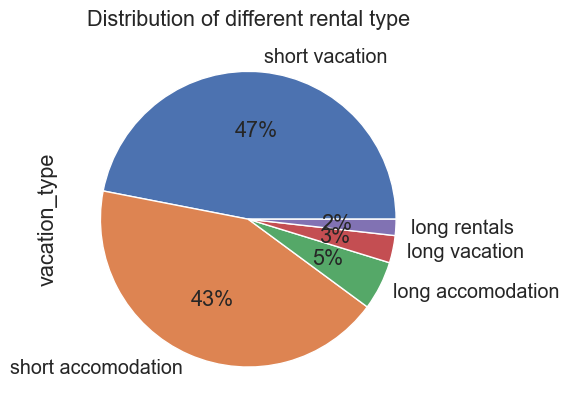

<Figure size 640x480 with 0 Axes>

In [131]:
counts.plot.pie(autopct='%1.0f%%').set(title = 'Distribution of different rental type')
plt.show()
plt.savefig('Distribution of different rental type.jpg')

### Insight of this graph above: 
#### from this pie chart, we can see that 'short vacation' and 'short accomodation' is the most popular minimum_days of the rental available in HongKong Airbnb market. It consist almost 70% of the entire HongKong Airbnb rentals. 
#### After adding the percentage to the pie chart, we are more clear that short vacation (0-7 days)  is more popular than short accomodation (15-30 days). 

In [132]:
df_cleaned.shape

(5194, 70)

In [133]:
df_cleaned

,id,listing_url,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,variables,vacation_type
0,17891,https://www.airbnb.com/rooms/17891,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,"Los Angeles, CA",...,4.66,NaN,f,1,1,0,0,0.47,"[[""pets allowed"", ""fire pit"", ""refrigerator""...",long accomodation
1,72571,https://www.airbnb.com/rooms/72571,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,304876,Brend,2010-11-30,Hong Kong,...,4.13,NaN,f,10,6,4,0,1.05,"[[""kitchen"", ""long term stays allowed"", ""was...",short vacation
2,923017,https://www.airbnb.com/rooms/923017,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,4971086,Alice,2013-02-05,Hong Kong,...,4.75,NaN,t,2,2,0,0,3.03,"[[""children\u2019s books and toys"", ""self che...",short vacation
3,944283,https://www.airbnb.com/rooms/944283,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,5100812,Nana,2013-02-15,Hong Kong,...,4.57,NaN,f,2,1,1,0,0.61,"[[""carbon monoxide alarm"", ""long term stays a...",short vacation
4,956857,https://www.airbnb.com/rooms/956857,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,5100812,Nana,2013-02-15,Hong Kong,...,5.00,NaN,f,2,1,1,0,0.04,"[[""carbon monoxide alarm"", ""long term stays a...",long vacation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969,https://www.airbnb.com/rooms/869969,city scrape,Studio available in Prince Edward,Studio<br /><br />Building with Lift.<br /><br...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,5.00,NaN,f,383,12,363,8,0.02,"[[""air conditioning"", ""wifi"", ""long term sta...",short accomodation
5190,870046,https://www.airbnb.com/rooms/870046,city scrape,10 mins to CITY U --------- by MTR,Fully furnished. No need to worry about any fu...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,4.00,NaN,f,383,12,363,8,0.01,"[[""long term stays allowed"", ""washer"", ""tv"",...",short accomodation
5191,894221,https://www.airbnb.com/rooms/894221,city scrape,Best room for you near MTR,"Best room 4 u near MTR,<br />-- next to MTR! <...",NaN,4584648,Ivy,2013-01-04,Hong Kong,...,NaN,NaN,f,383,12,363,8,NaN,"[[""long term stays allowed"", ""washer"", ""drye...",short accomodation
5192,894224,https://www.airbnb.com/rooms/894224,city scrape,Tsimshatsui Room in Flat Share,My place is close to restaurants and dining an...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,NaN,NaN,f,383,12,363,8,0.01,"[[""long term stays allowed"", ""washer"", ""tv"",...",long accomodation


In [134]:
df_cleaned['price'] = df_cleaned['price'].astype(str)
df_cleaned['price'].str.upper()

0       $1,400.00
1         $577.00
2       $1,036.00
3         $930.00
4         $351.00
          ...    
5189      $217.00
5190      $180.00
5191      $180.00
5192      $140.00
5193      $180.00
Name: price, Length: 5194, dtype: object

In [135]:
fixed=df_cleaned[["amenities", "price", "minimum_nights", "vacation_type"]]
fixed.to_csv("../data/raw/listing_Wing_processed.csv", index=None)
fixed

,amenities,price,minimum_nights,vacation_type
0,"[""pets allowed"", ""fire pit"", ""refrigerator"", ""...","$1,400.00",60,long accomodation
1,"[""kitchen"", ""long term stays allowed"", ""washer...",$577.00,2,short vacation
2,"[""children\u2019s books and toys"", ""self check...","$1,036.00",1,short vacation
3,"[""carbon monoxide alarm"", ""long term stays all...",$930.00,4,short vacation
4,"[""carbon monoxide alarm"", ""long term stays all...",$351.00,13,long vacation
...,...,...,...,...
5189,"[""air conditioning"", ""wifi"", ""long term stays ...",$217.00,30,short accomodation
5190,"[""long term stays allowed"", ""washer"", ""tv"", ""k...",$180.00,30,short accomodation
5191,"[""long term stays allowed"", ""washer"", ""dryer"",...",$180.00,30,short accomodation
5192,"[""long term stays allowed"", ""washer"", ""tv"", ""k...",$140.00,31,long accomodation


In [136]:
counts = df_cleaned['vacation_type'].value_counts()
counts

short vacation        2438
short accomodation    2231
long accomodation      278
long vacation          155
long rentals            92
Name: vacation_type, dtype: int64

In [137]:
print(fixed.dtypes)

amenities         object
price             object
minimum_nights     int64
vacation_type     object
dtype: object


In [148]:
fixed['price'] = [float(str(i).replace('$', '').replace(',', '')) for i in fixed['price']]

In [149]:
fixed["price"]= fixed["price"].astype("float64")
fixed = fixed.iloc[:1000] 


In [150]:
fixed['price'].loc['price'] = (lambda x: float(x.replace(',', '').replace('$', '')))
fixed['price']       

0      1400.0
1       577.0
2      1036.0
3       930.0
4       351.0
        ...  
995     180.0
996     180.0
997     250.0
998     650.0
999     217.0
Name: price, Length: 1000, dtype: float64

In [141]:
counts_means = fixed.groupby('vacation_type')['price'].mean()
counts_means

vacation_type
long accomodation      296.083333
long rentals           591.937500
long vacation         1146.880000
short accomodation     453.269103
short vacation        4372.318182
Name: price, dtype: float64

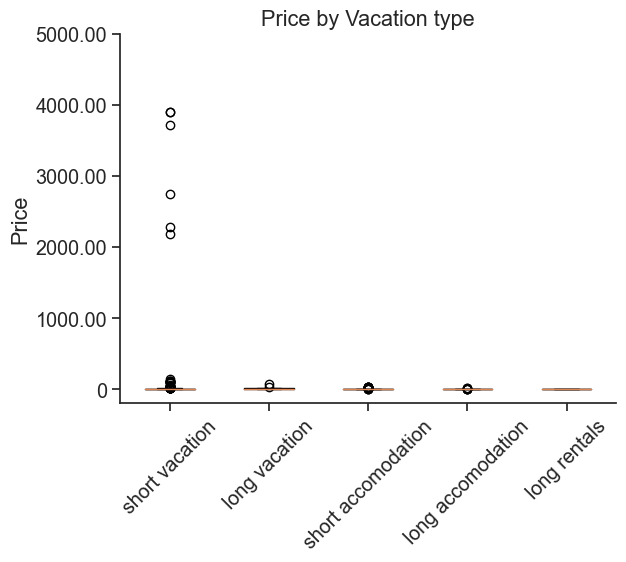

<Figure size 2000x1000 with 0 Axes>

In [142]:
plt.boxplot([fixed[fixed['vacation_type'] == 'short vacation']['price'],
           fixed[fixed['vacation_type'] == 'long vacation']['price'],
            fixed[fixed['vacation_type'] == 'short accomodation']['price'],
               fixed[fixed['vacation_type'] == 'long accomodation']['price'],
                 fixed[fixed['vacation_type'] == 'long rentals']['price']])
plt.title('Price by Vacation type')
plt.ylabel('Price')
plt.xticks([1,2,3,4,5],['short vacation', 'long vacation', 'short accomodation', 'long accomodation', 'long rentals'])
plt.xticks(rotation=45)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000], ['0', '1000.00', '2000.00', '3000.00', '4000.00', '5000.00'])
plt.figure(figsize=(20,10))
plt.show()


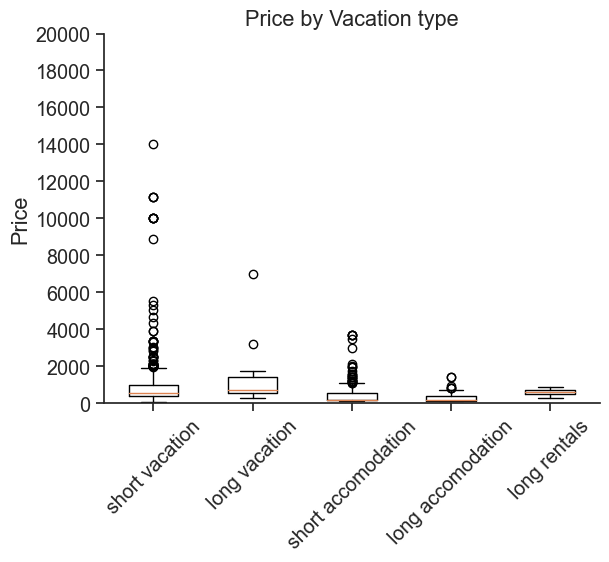

<Figure size 2000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [143]:
plt.boxplot([fixed[fixed['vacation_type'] == 'short vacation']['price'],
            fixed[fixed['vacation_type'] == 'long vacation']['price'],
            fixed[fixed['vacation_type'] == 'short accomodation']['price'],
               fixed[fixed['vacation_type'] == 'long accomodation']['price'],
                 fixed[fixed['vacation_type'] == 'long rentals']['price']])
plt.title('Price by Vacation type')
plt.ylabel('Price')
plt.xticks([1,2,3,4,5],['short vacation', 'long vacation', 'short accomodation', 'long accomodation', 'long rentals'])
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 500000, 2000))
plt.ylim(0,20000)
plt.figure(figsize=(20,10))
plt.show()
plt.savefig('../images/Price_by_vacation_type.png')

### insight to the graph above: 
#### As we zoom into the previous boxplot, it is more visualizable and clear that the short vacation price range has a wider variation. Long vacation type of rentals has higher price median than the other types. Likewise, the outliers indicates that there are some higher price short vacation Airbnb listings in HongKong. Short-term accomodation is the second most popular rental options in HongKong. short accomodation and long accomodation has a cheaper price per night among the rest of the rental types. 

### Milestone3 Task2 
#### The columns and dataset that I chose, is very limited to create my graphs. Since the 'amenities' columns is mainly strings and unable to used for plotting charts. Hence, it is difficult to draw connection to amenities, duration of stays and prices together visually. However, after grouping the variable, and count it. it becomes more visualizable. I will still stick to my current analysis question.  


## Conclusion
#### From the data above and graphs shown, HongKong Airbnb tends to focus on the customers for short term vacation for a week or short term rentals for up to 30 days. The top five amenities most HongKong Airbnb would provide are Air Conditioning, ability for long term stay, housing essentials, hangers, and kitchen. Some unique amenities that are provided would be HDTv with amazon prime video available, wifi, charcoal bbq grill, gas and so on. If the host want their Airbnb listing to be unique and outstanding from other Airbnb Listing, they could use this data as a reference to provide rare amenities that no one else have provided. While also make sure to have the essential amenities that the mass customer would be demanding. Overall, the HongKong airbnb host have great potential in a broad price range of Airbnb listing. As shown significantly the maximum price is up to HKD$ 14,000. Which means, there is possibily market that customer will be willing to consume luxury airbnb in HongKong. 

In [1]:
from codes import project_function_WingFan 
fdf = project_function_WingFan.load_and_process("../data/processed/wingfixed")
fdf

,amenities,price,minnights,rental_type,has_wifi,long_term_available
0,"[""Long term stays allowed"", ""Elevator"", ""Washe...","$1,000.00",1125,long term rentals,False,True
1,"[""Hot water"", ""Lock on bedroom door"", ""Hangers...",$400.00,600,short accomodation,False,True
2,"[""Self check-in"", ""Ceiling fan"", ""Clothing sto...",$877.00,365,long vaca,False,True
3,"[""Security cameras on property"", ""Long term st...",$220.00,365,long vaca,False,True
4,"[""Lock on bedroom door"", ""Long term stays allo...",$330.00,365,long vaca,False,True
...,...,...,...,...,...,...
3685,"[""Breakfast"", ""Kitchen"", ""Hangers"", ""Long term...",$880.00,2,short vaca,False,True
3686,"[""Self check-in"", ""Carbon monoxide alarm"", ""Lo...",$580.00,2,short vaca,False,True
3687,"[""Hot water"", ""Fire extinguisher"", ""Lock on be...",$206.00,2,short vaca,False,True
3688,"[""Long term stays allowed"", ""Shampoo"", ""Hair d...","$1,400.00",2,short vaca,False,True
